## Problem set 2  -- Manas Gupta 115515307

## Part 3 Breast cancer data set classification

In this problem set we have been given breast cancer data set on which we have to train our deep neural network and classify wheather the cancer is benign or malignant.




In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense, Dropout, Activation
import keras
from keras.models import Sequential
from keras import backend  
from keras.optimizers import Adam ,RMSprop
from keras.callbacks import TensorBoard


Using TensorFlow backend.


## 3.1 Loading the data

In [2]:
# loading training and test datasets
Data = pd.read_csv("Breast Cancer/breastCancerData.csv")
Labels = pd.read_csv("Breast Cancer/breastCancerLabels.csv")

## 3.2 Creation of test set

Here since we dont have testing data we will make 15% test data and the rest 85% as the training dataset.

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(Data, Labels, test_size=0.15)

## 3.3 Creation of validation set

Here since we dont have validation data we will make 10% validation data and the rest 90% as the training dataset.

In [4]:
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.1)

## 3.3 Create the Convolutional Neural Networks (CNN)
#### 1.  Define the model
#### 2.  Compile the model
#### 3.  Fit the model
First of all let us define the shape of the image before we define the model

**Types of layers used in the network**

Since we dont have any images to process its better we dont use convolution layer in our netwrok. Hence our network will be of following types:

**Fully connected or dense layer:**

Since we need the 1D output we have to add the fully connected layers and the function used for this is 'dense()'.
Here we are using 34 neurons in the hidden fully connected layer and since our ouput should be either 0 or 1 to classify the breast cancer data we are using 1 neuron in the output layer. The standard neuron numbers in the hidden layers are usually 32,64,128,256,512...

Here also we are using activation function as ReLU and since we have the classification problem to test for so, we we have to use the sigmoid activation function in the output layer.

We are using 3 hidden layers of type fully connected.

**Dropout**

We are using dropout after every fully connected layer with probability of 0.3, 0.5,0.5 respectively.

In [5]:
model = Sequential()

# Adding first fully connected layer 
model.add(Dense(units =32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# Adding first dropout
model.add(Dropout(rate=0.3))
# Adding second fully connected layer
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding second dropout
model.add(Dropout(rate=0.5))
# Adding third fully connected
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding third dropout
model.add(Dropout(rate=0.5))
# Adding output layer with Sigmoid activation function
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


## 3.4 Compling the model

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


## 3.5 Fitting the data

In [7]:
history=model.fit(train_data, train_labels, validation_data = (validation_data,validation_labels), batch_size = 5, epochs = 100)

Train on 521 samples, validate on 58 samples
Epoch 1/100
521/521 [==============================] - 0s 569us/step - loss: 0.6681 - acc: 0.7505 - val_loss: 0.6101 - val_acc: 0.9483
Epoch 2/100
521/521 [==============================] - 0s 159us/step - loss: 0.4731 - acc: 0.9098 - val_loss: 0.3523 - val_acc: 0.9483
Epoch 3/100
521/521 [==============================] - 0s 157us/step - loss: 0.2641 - acc: 0.9290 - val_loss: 0.2622 - val_acc: 0.9310
Epoch 4/100
521/521 [==============================] - 0s 158us/step - loss: 0.2127 - acc: 0.9443 - val_loss: 0.2555 - val_acc: 0.9310
Epoch 5/100
521/521 [==============================] - 0s 159us/step - loss: 0.1806 - acc: 0.9424 - val_loss: 0.2782 - val_acc: 0.9483
Epoch 6/100
521/521 [==============================] - 0s 159us/step - loss: 0.1852 - acc: 0.9367 - val_loss: 0.3378 - val_acc: 0.9310
Epoch 7/100
521/521 [==============================] - 0s 163us/step - loss: 0.1554 - acc: 0.9386 - val_loss: 0.2833 - val_acc: 0.9310
Epoch 8/10

Epoch 61/100
521/521 [==============================] - 0s 149us/step - loss: 0.0932 - acc: 0.9712 - val_loss: 0.2793 - val_acc: 0.9655
Epoch 62/100
521/521 [==============================] - 0s 147us/step - loss: 0.1074 - acc: 0.9712 - val_loss: 0.2648 - val_acc: 0.9655
Epoch 63/100
521/521 [==============================] - 0s 146us/step - loss: 0.1156 - acc: 0.9770 - val_loss: 0.2139 - val_acc: 0.9655
Epoch 64/100
521/521 [==============================] - 0s 150us/step - loss: 0.0753 - acc: 0.9750 - val_loss: 0.3430 - val_acc: 0.9655
Epoch 65/100
521/521 [==============================] - 0s 153us/step - loss: 0.1155 - acc: 0.9750 - val_loss: 0.2266 - val_acc: 0.9483
Epoch 66/100
521/521 [==============================] - 0s 156us/step - loss: 0.0783 - acc: 0.9770 - val_loss: 0.2179 - val_acc: 0.9655
Epoch 67/100
521/521 [==============================] - 0s 154us/step - loss: 0.1030 - acc: 0.9808 - val_loss: 0.2735 - val_acc: 0.9655
Epoch 68/100
521/521 [==========================

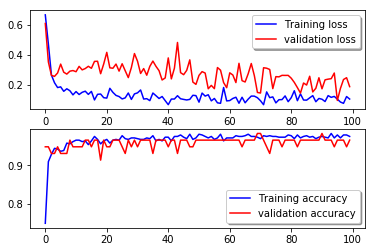

In [17]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 3.6 Running on test data

In [9]:
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.2120945778091776
Test accuracy: 0.970873786407767


## 3.7 Running Tensorboard

We are using tensorborad for better visualization of various graphs of accuracy, loss, biases, weights etc...

In [10]:
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()), write_graph=True, write_images=True, histogram_freq=1)

model.fit(train_data, train_labels, validation_data=(test_data, test_labels), verbose=1, callbacks=[tensorboard])

Train on 521 samples, validate on 103 samples
Epoch 1/1
521/521 [==============================] - 0s 33us/step - loss: 0.0841 - acc: 0.9789 - val_loss: 0.1678 - val_acc: 0.9709


**Biases and weights of the fully connected layers**

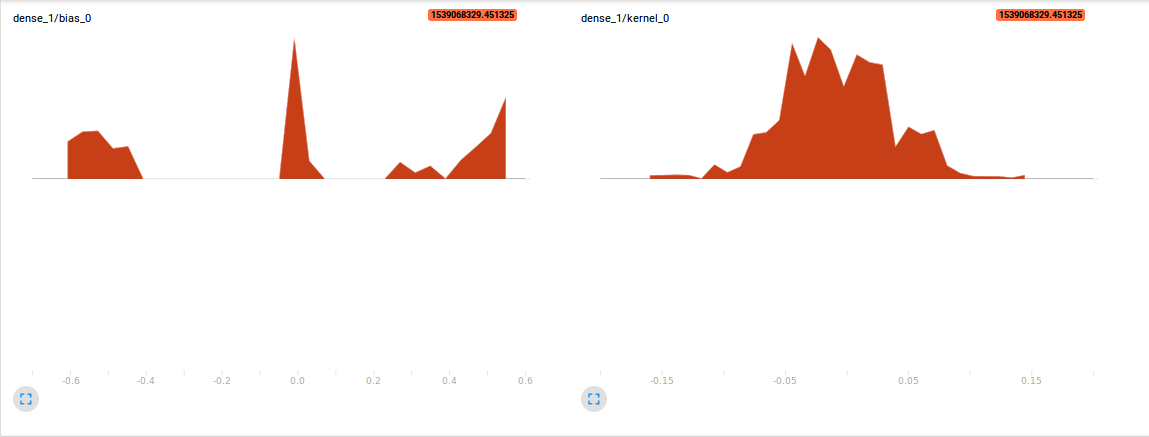

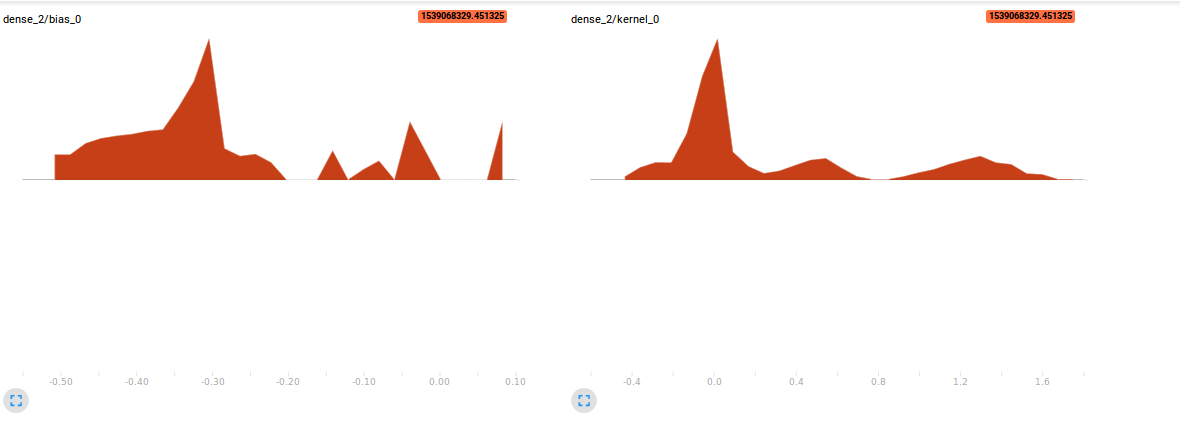